In [1]:
!ls

accuracy.pdf		   confusion_matrix.pdf  loss.pdf   Untitled.ipynb
classification_report.csv  datasets		 README.md
confusion_matrix.npy	   df.csv		 results


In [2]:
import pandas as pd, numpy as np, os, sys

In [3]:
from datasets import dataset

In [4]:
#df = dataset.convert_xml_to_csv('datasets/pan19-author-profiling-training-2019-01-28','en')
df = pd.read_csv('df.csv')

In [5]:
display(df.head())

print("Female: ", len(df[df['gender'] == 'female']))
print("Male: ", len(df[df['gender'] == 'male']))
print("Bot: ", len(df[df['gender'] == 'bot']))
print("Total: ", len(df))

,Unnamed: 0,author_id,entity,gender,text,seq
0,0,513e237429859f8123f546158fa6580f,bot,bot,Check out these awesome climbing t-shirts &amp...,0.0
1,1,513e237429859f8123f546158fa6580f,bot,bot,Caring For Your New Garage Floors http://t.co...,1.0
2,2,513e237429859f8123f546158fa6580f,bot,bot,Introduction to the Major Work Shoe Brands ht...,2.0
3,3,513e237429859f8123f546158fa6580f,bot,bot,There is no psychiatrist in the world like a p...,3.0
4,4,513e237429859f8123f546158fa6580f,bot,bot,Be Prepared! Learn About these Bartering Reso...,4.0


Female:  103000
Male:  103000
Bot:  206000
Total:  412000


In [6]:
df['bot'] = df['entity']#.apply(lambda x: 1 if x == 'bot' else 0)
df['gender_int'] = df['gender'].apply(lambda x: 0 if x == 'female' else 1)

In [7]:
text_gender = df[df['entity'] != 'bot']['text'].values 
gender = df[df['entity'] != 'bot']['gender_int'].values
text_bot = df['text'].values 
is_bot = df['bot'].values

In [8]:
len(text_bot), len(is_bot), len(text_gender), len(gender)

(412000, 412000, 206000, 206000)

In [9]:
len(gender[gender == 1]), len(gender[gender == 0])

(103000, 103000)

In [10]:
l_char = [len(i) for i in df['text'].values]
l_word = [len(i.split(" ")) for i in df['text'].values]
print("mean: ", np.mean(l_char), np.mean(l_word))
print("median: ", np.median(l_char), np.median(l_word))

mean:  112.5615 16.356356796116504
median:  101.0 15.0


In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### is bot

In [12]:
X_train, X_test, y_train, y_test = train_test_split(text_bot, is_bot, test_size=0.2)
print(np.array(X_train).shape, np.array(y_train).shape, np.array(X_test).shape, np.array(y_test).shape)
"""
vect = TfidfVectorizer(analyzer='word')

X_train_v = vect.fit_transform(X_train)
X_test_v = vect.transform(X_test)

clf = LogisticRegressionCV(cv=3, solver='liblinear')

clf.fit(X_train_v, y_train)

y_pred = clf.predict(X_test_v)

print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred)) 
print(confusion_matrix(y_test, y_pred))
"""

(329600,) (329600,) (82400,) (82400,)


"\nvect = TfidfVectorizer(analyzer='word')\n\nX_train_v = vect.fit_transform(X_train)\nX_test_v = vect.transform(X_test)\n\nclf = LogisticRegressionCV(cv=3, solver='liblinear')\n\nclf.fit(X_train_v, y_train)\n\ny_pred = clf.predict(X_test_v)\n\nprint(classification_report(y_test, y_pred)) \nprint(accuracy_score(y_test, y_pred)) \nprint(confusion_matrix(y_test, y_pred))\n"

### gender

In [23]:
X_train, X_test, y_train, y_test = train_test_split(text_gender, gender, test_size=0.2)
print(np.array(X_train).shape, np.array(y_train).shape, np.array(X_test).shape, np.array(y_test).shape)

vect = TfidfVectorizer(analyzer='word')

X_train_v = vect.fit_transform(X_train)
X_test_v = vect.transform(X_test)

clf = LogisticRegressionCV(cv=3, solver='liblinear')

clf.fit(X_train_v, y_train)

y_pred = clf.predict(X_test_v)

print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred)) 
print(confusion_matrix(y_test, y_pred))


(164800,) (164800,) (41200,) (41200,)
              precision    recall  f1-score   support

           0       0.80      0.83      0.81     20531
           1       0.82      0.79      0.81     20669

   micro avg       0.81      0.81      0.81     41200
   macro avg       0.81      0.81      0.81     41200
weighted avg       0.81      0.81      0.81     41200

0.8105582524271845
[[17024  3507]
 [ 4298 16371]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(text_gender, gender, test_size=0.2)
print(np.array(X_train).shape, np.array(y_train).shape, np.array(X_test).shape, np.array(y_test).shape)

vect = TfidfVectorizer(analyzer='char', ngram_range=(3,9))

X_train_v = vect.fit_transform(X_train)
X_test_v = vect.transform(X_test)

clf = LogisticRegressionCV(cv=3, solver='liblinear')

clf.fit(X_train_v, y_train)

y_pred = clf.predict(X_test_v)

print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred)) 
print(confusion_matrix(y_test, y_pred))


(164800,) (164800,) (41200,) (41200,)


In [14]:
from Models.functions.plot import plot_history, full_multiclass_report
from Models.functions.preprocessing import clean, labelEncoder

In [15]:
from keras.models import Model
from keras.layers import Input, Dense, Flatten
from keras.layers import Convolution1D
from keras.layers import MaxPooling1D
from keras.layers import Embedding
from keras.layers import ThresholdedReLU
from keras.layers import Dropout
from keras.callbacks import TensorBoard
from keras.layers.merge import concatenate, add
from keras import regularizers
from keras.utils import to_categorical


Using TensorFlow backend.


In [16]:
# CharCNNZhang
def build_model( 
                input_size, 
                alphabet_size, 
                conv_layers,
                fully_connected_layers,
                embedding_size, 
                threshold, 
                dropout_p, 
                num_of_classes, 
                optimizer='adam', 
                loss='categorical_crossentropy', # binary
                # loss='sparse_categorical_crossentropy', # integers
                metrics = ['accuracy'],
                concat = False,
               ):
    """
    Build and compile the Character Level CNN model
    Returns: None
    """
    # Input layer
    inputs = Input(shape=(input_size,), name='sent_input', dtype='int64')
    # Embedding layers
    x = Embedding(alphabet_size + 1, embedding_size, input_length=input_size, trainable=True)(inputs)
    # Convolution layers
    if concat:
        channels = []
        
    for cl in conv_layers:
        
        x1 = Convolution1D(cl[0], cl[1], activation='tahn', padding='same', kernel_regularizer=regularizers.l2(0.03))(x)
        # x = ThresholdedReLU(threshold)(x)
        if cl[2] != -1:
            x1 = MaxPooling1D(cl[2], padding='valid')(x1)
        
        if concat:
            channels.append(x1)
        else:
            x = x1
    
    if concat:
        x1 = concatenate(channels, axis=1)
    
    x = Flatten()(x1)
    # Fully connected layers
    for fl in fully_connected_layers:
        x = Dense(fl, activation='relu')(x)
        #x = ThresholdedReLU(threshold)(x)
        x = Dropout(dropout_p)(x)
    # Output layer
    predictions = Dense(num_of_classes, activation='softmax')(x)
    # Build and compile model
    model = Model(inputs=inputs, outputs=predictions)
    model.compile(optimizer=optimizer, loss=loss, metrics = metrics)
    model = model
    print("CharCNNZhang model built: ")
    model.summary()
    return model

In [17]:
def format_data(data):

    # str_to_indexes
    def str_to_indexes(s, length, dict_char):
        """
        Convert a string to character indexes based on character dictionary.

        Args:
            s (str): String to be converted to indexes
        Returns:
            str2idx (np.ndarray): Indexes of characters in s
        """
        s = s.lower()
        max_length = min(len(s), length)
        str2idx = np.zeros(length, dtype='int64')
        for i in range(1, max_length + 1):
            c = s[-i]
            if c in dict_char:
                str2idx[i - 1] = dict_char[c]
        return str2idx
        

    alphabet="abcdefghijklmnopqrstuvwxyz0123456789-,;.!?:'\"/\\|_@#$%^&*~`+-=<>()[]{} "
    alphabet_size = len(alphabet)
    input_size = 128
    dict_char = {}
    for idx, char in enumerate(alphabet):
        dict_char[char] = idx + 1
    length = input_size

    data_size = len(data)
    
    """
    Return all loaded data from data variable.
    Returns:
        (np.ndarray) Data transformed from raw to indexed form with associated one-hot label.
    """
    data_size = len(data)
    start_index = 0
    end_index = data_size
    batch_texts = data[start_index:end_index]
    batch_indices = []
    #one_hot = np.eye(no_of_classes, dtype='int64')
    classes = []
    for s in batch_texts:
        batch_indices.append(str_to_indexes(s, length, dict_char))
        #c = int(c) - 1
        #classes.append(one_hot[c])
    return np.asarray(batch_indices, dtype='int64'), np.asarray(classes), dict_char, alphabet_size

In [18]:
X_char, cl, dict_char, alphabet_size = format_data(text_gender)
y = to_categorical(gender)
X_train, X_test, y_train, y_test = train_test_split(X_char, y, test_size=0.2)
print(np.array(X_train).shape, np.array(y_train).shape, np.array(X_test).shape, np.array(y_test).shape)
y[0]

(164800, 128) (164800, 2) (41200, 128) (41200, 2)


array([1., 0.], dtype=float32)

In [19]:
params_grid = dict(
        input_size = X_train.shape[1],
        alphabet_size = alphabet_size,
        embedding_size = 32,
        # feature maps, kernel, maxpooling
        conv_layers = [[64,3,3],[64,12,3]],#[64,3,-1],[64,3,-1],[64,3,3]],
        fully_connected_layers = [1024, 1024],
        threshold = 1e-6,
        dropout_p = 0.5,
        num_of_classes = 2,
        epochs = 20,
        batch_size = 32
)

In [20]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

params = params_grid

## create the model with the best params found
model = build_model(
    input_size=params["input_size"],
     alphabet_size=params["alphabet_size"],
     embedding_size=params["embedding_size"],
     conv_layers=params["conv_layers"],
     fully_connected_layers=params["fully_connected_layers"],
     num_of_classes=params["num_of_classes"],
     threshold=params["threshold"],
     dropout_p=params["dropout_p"],
     concat=True
     #optimizer=params["optimizer"],
     #loss=params["loss"])
)
## Then train it and display the results
history = model.fit(X_train,
                    y_train,
                    epochs=params['epochs'],
                    validation_split=0.2,
                    batch_size=params['batch_size'],
                    verbose = 1,
                       callbacks=[
                           #ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, min_lr=0.01),
                           #EarlyStopping(monitor='val_loss', min_delta=0.5, patience=4, verbose=1)
                  ])

CharCNNZhang model built: 
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
sent_input (InputLayer)         (None, 128)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 128, 32)      2272        sent_input[0][0]                 
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 128, 64)      6208        embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 128, 64)      24640       embedding_1[0][0]                
__________________________________________________________________________________

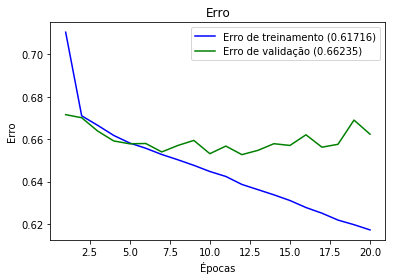

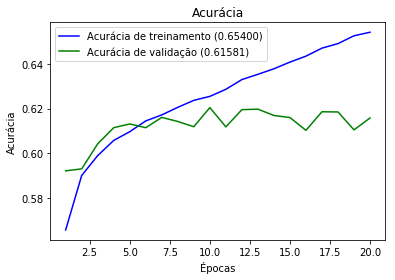

In [21]:
directory='./'

plot_history(history, directory=directory, show=True)

In [22]:

full_multiclass_report(model,
                       X_test,
                       y_test,
                       classes=['female','male'],
                       directory=directory,
                       binary=False)

Accuracy : 0.6096359223300971

Classification Report
              precision    recall  f1-score   support

           0    0.60720   0.61615   0.61164     20555
           1    0.61213   0.60315   0.60761     20645

   micro avg    0.60964   0.60964   0.60964     41200
   macro avg    0.60967   0.60965   0.60963     41200
weighted avg    0.60967   0.60964   0.60962     41200

[[12665  7890]
 [ 8193 12452]]
Normalized confusion matrix
[[0.61615179 0.38384821]
 [0.39685154 0.60314846]]
